<a href="https://colab.research.google.com/github/JhonnyLimachi/Sigmoidal/blob/main/58_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/eds.png" height="100px"></p>

# Aula 008: TensorFlow

***Fashion MNIST*** é um *dataset* considerado o *Hello, World!* de **Deep Learning** aplicado a problemas de **Visão Computacional**.

Contendo 60 mil imagens para treinamento e 10 mil para teste, é um *dataset* bem melhor que o antigo **MNIST** (que continha apenas digitos manuscritos).

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/fashion-mnist-sprite.png" height="400px"></p>

Ao total, as 70 mil imagens têm dimensões de 28 x 28 *pixels*, como mostra a imagem acima. Cada uma dessas imagens é classificada com um desses 10 *labels*:

<table>
  <tbody><tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</tbody></table>

Nesta Aula 008, iremos implementar uma rede neural que usa apenas camadas Densas, seguindo o *intuition* dados nas últimas 3 aulas.

No entanto, quando se trata de imagens, normalmente iremos procurar um tipo específico de rede neural: Redes Neurais Convolucionais (*Convolutional Neural Networks*).

Por enquanto, vamos entender como resolver o *Fashion MNIST* usando o TensorFlow.

In [1]:
# importar as bibliotecas necessárias
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# carregar os dados do Fashion MNIST
(X_train_orig, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# ver dimensionalidade
print("X_train:\t", X_train_orig.shape)
print("y_train:\t", y_train.shape)
print("X_test:\t\t", X_test.shape)
print("y_test:\t\t", y_test.shape)

X_train:	 (60000, 28, 28)
y_train:	 (60000,)
X_test:		 (10000, 28, 28)
y_test:		 (10000,)


Como usaremos um algoritmo de otimização baseado em gradiente, é preciso padronizar os pixels, o que é feito diretamente ao se dividir por 255.0. Ressalta-se que tal operação já transforma os `int` em `float`.

Como o *FASHION MNIST* não possui dados de validação, irei pegar 10% dos valores com essa finalidade.

In [4]:
# padronizar o dataset de treino e criar um de validação
X_valid, X_train = X_train_orig[:6000] / 255.0, X_train_orig[6000:] / 255.0
y_valid, y_train = y_train[:6000], y_train[6000:]

In [5]:
# De acordo com a documentação, os labels são:
class_names = ['Camisetas/top', 'Calça', 'Suéter',
               'Vestidos','Casaco', 'Sandálias',
               'Camisas', 'Tênis', 'Bolsa', 'Botas']

In [6]:
# ver exemplo de uma imagem aleatória
class_names[y_train[0]]

'Bolsa'

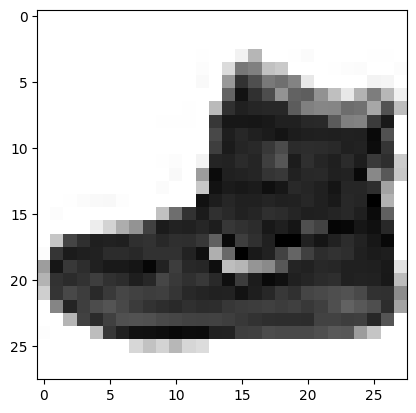

In [7]:
# plotar a imagem aleatória
plt.imshow(X_train_orig[0], cmap=plt.cm.binary);

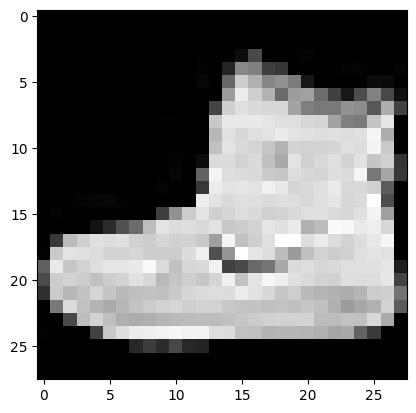

In [8]:
# plotar a imagem aleatória
plt.imshow(X_train_orig[0], cmap='gray');

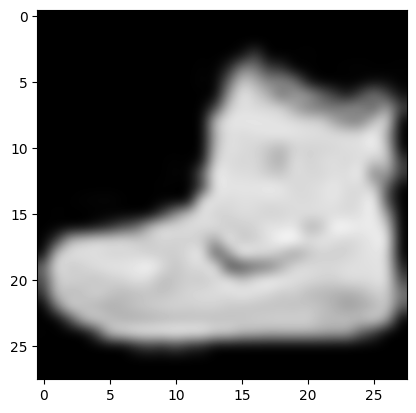

In [9]:
# plotar a imagem aleatória com interpolação diferente
plt.imshow(X_train_orig[0], cmap='gray', interpolation="bicubic");

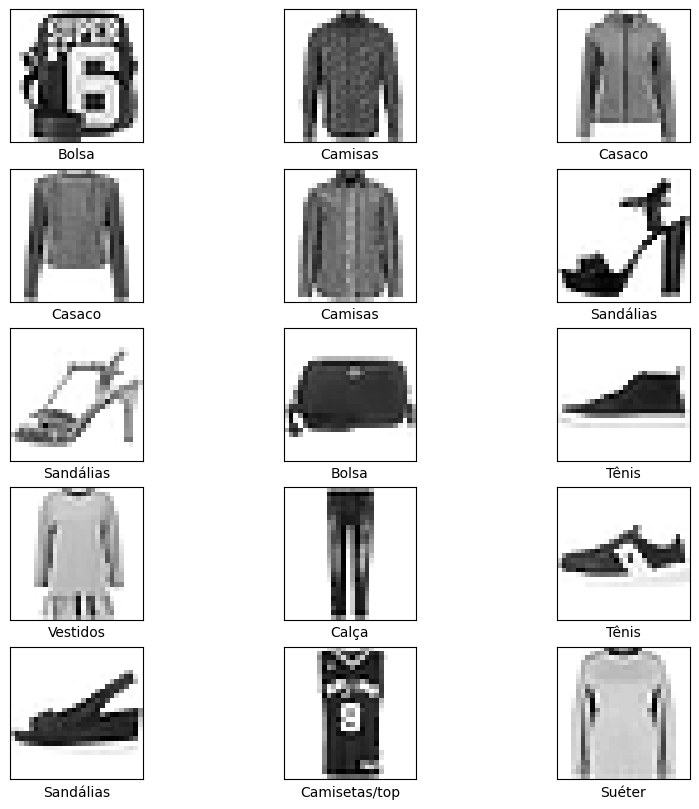

In [10]:
# ver algumas imagens de exemplo
plt.figure(figsize=(10,10))

for i in range(15):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Vamos criar um modelo bem simples de Rede Neural, usando apenas uma *hidden layer*.

In [11]:
# modelo 1
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(784, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))